# **Objektif**

**A.  Analisa Descriptive Statistic**
1.   Berapa rata rata umur pada data tersebut?
2.   Berapa rata rata nilai BMI dari yang merokok?
3.   Apakah variansi dari tagihan kesehatan perokok dan non perokok sama?
4.   Apakah rata rata umur perempuan dan laki-laki yang merokok sama?
5.   Mana yang lebih tinggi, rata rata tagihan kesehatan perokok atau non merokok?
6.   Mana yang lebih tinggi, rata rata tagihan kesehatan perokok yang BMI nya diatas 25 atau non perokok yang BMI nya diatas 25 (overweight)
7. BMI mana yang lebih tinggi, seseorang perokok atau non perokok?

**B.  Analisa Variabel Diskrit**
1.   Gender mana yang memiliki tagihan paling tinggi?
2.   Apakah setiap region memiliki proporsi data banyak orang yang sama?
3.   Mana yang lebih tinggi proporsi perokok atau non perokok?
4.   Berapa peluang seseorang tersebut adalah perempuan diketahui dia adalah perokok?
5.   Berapa peluang seseorang tersebut adalah laki-laki diketahui dia adalah perokok?
6. Bagaimana bentuk distribusi peluang besar tagihan dari tiap-tiap region?

**C.  Analisa Variabel Kontinu**
1.   Mana yang lebih mungkin terjadi
- Seseorang dengan BMI diatas 25 mendapatkan tagihan kesehatan diatas 16.7k, atau
- Seseorang dengan BMI dibawah 25 mendapatkan tagihan kesehatan diatas 16.7k
2.   Mana yang lebih mungkin terjadi
- Seseorang perokok dengan BMI diatas 25 mendapatkan tagihan kesehatan diatas 16.7k, atau
- Seseorang non perokok dengan BMI diatas 25 mendapatkan tagihan kesehatan diatas 16.7k

**D.  Analisa Korelasi Variabel**
- Keterkaitan antar kolom di data tagihan kesehatan

**E.  Pengujian Hipotesis**
1. Tagihan kesehatan perokok lebih tinggi daripada tagihan kesehatan non perokok
2. Proporsi perokok laki laki lebih besar dari perempuan
3. Variansi tagihan kesehatan perokok dan non perokok sama
4. Tagihan kesehatan dengan BMI diatas 25 lebih tinggi daripada tagihan kesehatan dengan BMI dibawah 25
5. Tagihan kesehatan laki-laki lebih besar dari perempuan

In [3]:
# konek google colab dengan google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# import library sesuai kebutuhan
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import f

# konek data tagihan kesehatan
file_path = "/content/drive/MyDrive/Probability/insurance.csv"
df = pd.read_csv(file_path)
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
# cek tipe data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
# cek unik data untuk kolom non numerik
print(df['sex'].unique())
print(df['smoker'].unique())
print(df['region'].unique())

['female' 'male']
['yes' 'no']
['southwest' 'southeast' 'northwest' 'northeast']


In [ ]:
# cek distribusi data
print(df['age'].describe())
print(df['bmi'].describe())
print(df['children'].describe())
print(df['charges'].describe())

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64
count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64
count    1338.000000
mean        1.094918
std         1.205493
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         5.000000
Name: children, dtype: float64
count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64


In [ ]:
# A. Analisa Descriptive Statistic
# 1. Berapa rata rata umur pada data tersebut?

# menghitung rata-rata umur
rata_umur = df['age'].mean()

# menampilkan hasil
print("Rata-rata umur: ", rata_umur)

Rata-rata umur:  39.20702541106129


In [ ]:
# A. Analisa Descriptive Statistic
# 2. Berapa rata rata nilai BMI dari yang merokok?

# menghitung rata-rata BMI dari yang merokok
rata_bmi_merokok = df.loc[df['smoker'] == 'yes', 'bmi'].mean()

# menampilkan hasil
print("Rata-rata nilai BMI dari yang merokok: ", rata_bmi_merokok)

Rata-rata nilai BMI dari yang merokok:  30.70844890510949


In [ ]:
# A. Analisa Descriptive Statistic
# 3. Apakah variansi dari tagihan kesehatan perokok dan non perokok sama?

# memisahkan data perokok dan non-perokok
perokok = df.loc[df['smoker'] == 'yes', 'charges']
non_perokok = df.loc[df['smoker'] == 'no', 'charges']

# melakukan uji perbedaan varian
stat, pvalue = stats.levene(perokok, non_perokok)

# menampilkan hasil
if pvalue < 0.05:
  print("Variansi dari tagihan kesehatan perokok dan non-perokok berbeda")
else:
  print("Variansi dari tagihan kesehatan perokok dan non-perokok sama")

Variansi dari tagihan kesehatan perokok dan non-perokok berbeda


In [ ]:
# A. Analisa Descriptive Statistic
# 4. Apakah rata rata umur perempuan dan laki-laki yang merokok sama?

# menghitung rata-rata umur perempuan dan laki-laki yang merokok
rata_perempuan = df.loc[(df['smoker'] == 'yes') & (df['sex'] == 'female'), 'age'].mean()
rata_laki_laki = df.loc[(df['smoker'] == 'yes') & (df['sex'] == 'male'), 'age'].mean()

# menampilkan hasil
print("Rata-rata umur perempuan yang merokok: ", rata_perempuan)
print("Rata-rata umur laki-laki yang merokok: ", rata_laki_laki)

if rata_perempuan == rata_laki_laki:
  print("Rata-rata umur perempuan dan laki-laki yang merokok sama")
else:
  print("Rata-rata umur perempuan dan laki-laki yang merokok tidak sama")

Rata-rata umur perempuan yang merokok:  38.608695652173914
Rata-rata umur laki-laki yang merokok:  38.44654088050314
Rata-rata umur perempuan dan laki-laki yang merokok tidak sama


In [ ]:
# A. Analisa Descriptive Statistic
# 5. Mana yang lebih tinggi, rata rata tagihan kesehatan perokok atau non merokok?

# menghitung rata-rata tagihan kesehatan perokok dan non-perokok
rata_perokok = df.loc[df['smoker'] == 'yes', 'charges'].mean()
rata_nonperokok = df.loc[df['smoker'] == 'no', 'charges'].mean()

# menampilkan hasil
print("Rata-rata tagihan kesehatan perokok: ", rata_perokok)
print("Rata-rata tagihan kesehatan non-perokok: ", rata_nonperokok)

if rata_perokok > rata_nonperokok:
  print("Rata-rata tagihan kesehatan perokok lebih tinggi")
elif rata_perokok < rata_nonperokok:
  print("Rata-rata tagihan kesehatan non-perokok lebih tinggi")
else:
  print("Rata-rata tagihan kesehatan perokok dan non-perokok sama")

Rata-rata tagihan kesehatan perokok:  32050.23183153284
Rata-rata tagihan kesehatan non-perokok:  8434.268297856204
Rata-rata tagihan kesehatan perokok lebih tinggi


In [ ]:
# A. Analisa Descriptive Statistic
# 6. Mana yang lebih tinggi, rata rata tagihan kesehatan perokok yang BMI nya diatas 25 atau non perokok yang BMI nya diatas 25 (overweight)

# menghitung rata-rata tagihan kesehatan perokok yang BMI-nya di atas 25
rata_perokok = df.loc[(df['smoker'] == 'yes') & (df['bmi'] > 25), 'charges'].mean()

# menghitung rata-rata tagihan kesehatan non-perokok yang BMI-nya di atas 25
rata_non_perokok = df.loc[(df['smoker'] == 'no') & (df['bmi'] > 25), 'charges'].mean()

# menampilkan hasil
print("Rata-rata tagihan kesehatan perokok yang BMI-nya di atas 25: ", rata_perokok)
print("Rata-rata tagihan kesehatan non-perokok yang BMI-nya di atas 25: ", rata_non_perokok)

if rata_perokok > rata_non_perokok:
  print("Rata-rata tagihan kesehatan perokok yang BMI-nya di atas 25 lebih tinggi")
else:
  print("Rata-rata tagihan kesehatan non-perokok yang BMI-nya di atas 25 lebih tinggi")

Rata-rata tagihan kesehatan perokok yang BMI-nya di atas 25:  35116.90965694064
Rata-rata tagihan kesehatan non-perokok yang BMI-nya di atas 25:  8629.589609712157
Rata-rata tagihan kesehatan perokok yang BMI-nya di atas 25 lebih tinggi


In [ ]:
# A. Analisa Descriptive Statistic
# 7. BMI mana yang lebih tinggi, seseorang perokok atau non perokok?

# menghitung rata-rata BMI perokok
rata_perokok = df.loc[df['smoker'] == 'yes', 'bmi'].mean()

# menghitung rata-rata BMI non-perokok
rata_non_perokok = df.loc[df['smoker'] == 'no', 'bmi'].mean()

# menampilkan hasil
print("Rata-rata BMI perokok: ", rata_perokok)
print("Rata-rata BMI non-perokok: ", rata_non_perokok)

if rata_perokok > rata_non_perokok:
  print("Rata-rata BMI perokok lebih tinggi")
else:
  print("Rata-rata BMI non-perokok lebih tinggi")

Rata-rata BMI perokok:  30.70844890510949
Rata-rata BMI non-perokok:  30.651795112781954
Rata-rata BMI perokok lebih tinggi


Rata-rata tagihan laki-laki:  13956.751177721893
Rata-rata tagihan perempuan:  12569.578843835347


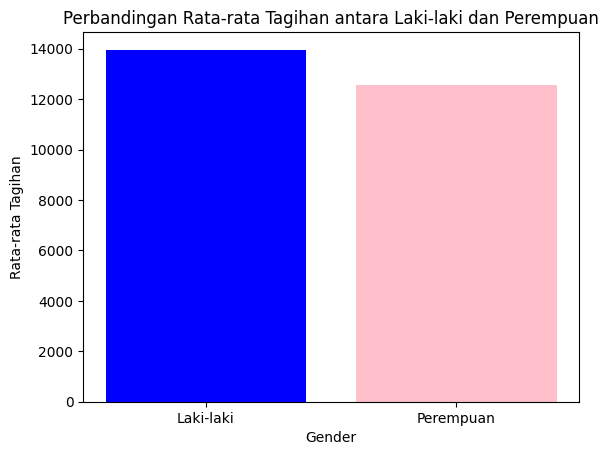

In [ ]:
# Analisa Variabel Diskrit
# 1. Gender mana yang memiliki tagihan paling tinggi?

# menghitung rata-rata tagihan per gender
rata_laki = df.loc[df['sex'] == 'male', 'charges'].mean()
rata_perempuan = df.loc[df['sex'] == 'female', 'charges'].mean()

# menampilkan hasil
print("Rata-rata tagihan laki-laki: ", rata_laki)
print("Rata-rata tagihan perempuan: ", rata_perempuan)

# membuat plot
labels = ['Laki-laki', 'Perempuan']
rata_rata = [rata_laki, rata_perempuan]
colors = ['blue', 'pink']
plt.bar(labels, rata_rata, color=colors)

# memberi label pada plot
plt.title('Perbandingan Rata-rata Tagihan antara Laki-laki dan Perempuan')
plt.xlabel('Gender')
plt.ylabel('Rata-rata Tagihan')

# menampilkan plot
plt.show()

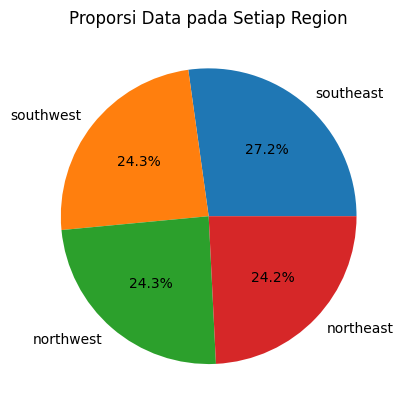

In [ ]:
# Analisa Variabel Diskrit
# 2. Apakah setiap region memiliki proporsi data banyak orang yang sama?

# menghitung proporsi data pada setiap region
region_counts = df['region'].value_counts(normalize=True)

# membuat chart pie
plt.pie(region_counts, labels=region_counts.index, autopct='%1.1f%%')

# memberi judul pada chart pie
plt.title('Proporsi Data pada Setiap Region')

# menampilkan chart pie
plt.show()

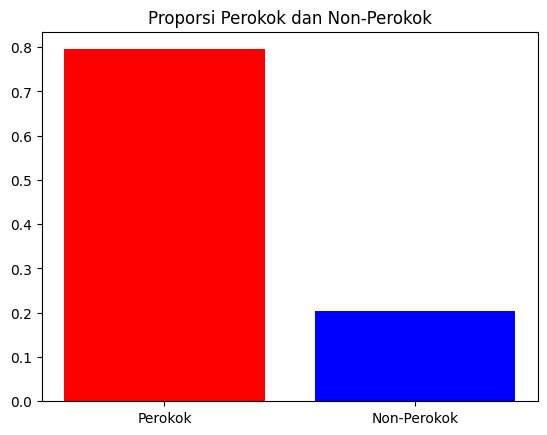

In [ ]:
# Analisa Variabel Diskrit
# 3. Mana yang lebih tinggi proporsi perokok atau non perokok?

# menghitung jumlah perokok dan non-perokok
smoker_counts = df['smoker'].value_counts()

# menghitung proporsi perokok dan non-perokok
smoker_props = smoker_counts / len(df)

# membuat bar plot
plt.bar(['Perokok', 'Non-Perokok'], smoker_props, color=['red', 'blue'])

# memberi judul pada plot
plt.title('Proporsi Perokok dan Non-Perokok')

# menampilkan plot
plt.show()

In [ ]:
# Analisa Variabel Diskrit
# 4. Berapa peluang seseorang tersebut adalah perempuan diketahui dia adalah perokok?

# menghitung jumlah perokok dan non-perokok
smoker_counts = df['smoker'].value_counts()

# menghitung probabilitas perokok dan non-perokok
prob_smoker = smoker_counts['yes'] / len(df)
prob_non_smoker = smoker_counts['no'] / len(df)

# menghitung probabilitas Female and Smoker
prob_female_smoker = len(df[(df['sex'] == 'female') & (df['smoker'] == 'yes')]) / len(df)

# menghitung probabilitas Female|Smoker
prob_female_given_smoker = prob_female_smoker / prob_smoker

# menampilkan hasil
print('Peluang seseorang adalah perempuan diketahui dia adalah perokok:', prob_female_given_smoker)

Peluang seseorang adalah perempuan diketahui dia adalah perokok: 0.4197080291970803


In [ ]:
# Analisa Variabel Diskrit
# 5. Berapa peluang seseorang tersebut adalah laki-laki diketahui dia adalah perokok?

# menghitung jumlah perokok dan non-perokok
smoker_counts = df['smoker'].value_counts()

# menghitung probabilitas perokok dan non-perokok
prob_smoker = smoker_counts['yes'] / len(df)
prob_non_smoker = smoker_counts['no'] / len(df)

# menghitung probabilitas Female and Smoker
prob_male_smoker = len(df[(df['sex'] == 'male') & (df['smoker'] == 'yes')]) / len(df)

# menghitung probabilitas Female|Smoker
prob_male_given_smoker = prob_male_smoker / prob_smoker

# menampilkan hasil
print('Peluang seseorang adalah laki-laki diketahui dia adalah perokok:', prob_male_given_smoker)

Peluang seseorang adalah laki-laki diketahui dia adalah perokok: 0.5802919708029197


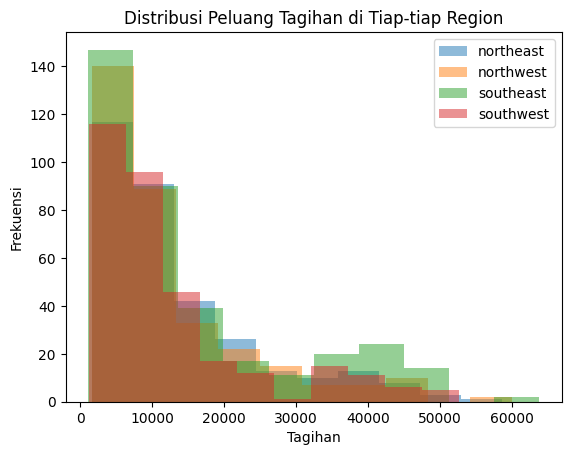

In [ ]:
# Analisa Variabel Diskrit
# 6. Bagaimana bentuk distribusi peluang besar tagihan dari tiap-tiap region?

# membuat plot
df.groupby('region')['charges'].plot(kind='hist', alpha=0.5, legend=True)

# memberi label pada plot
plt.title('Distribusi Peluang Tagihan di Tiap-tiap Region')
plt.xlabel('Tagihan')
plt.ylabel('Frekuensi')

# menampilkan plot
plt.show()

Proporsi orang dengan BMI di atas 25 yang mendapatkan tagihan kesehatan di atas 16.7k: 84.73 %
Proporsi orang dengan BMI di bawah 25 yang mendapatkan tagihan kesehatan di atas 16.7k: 15.27 %


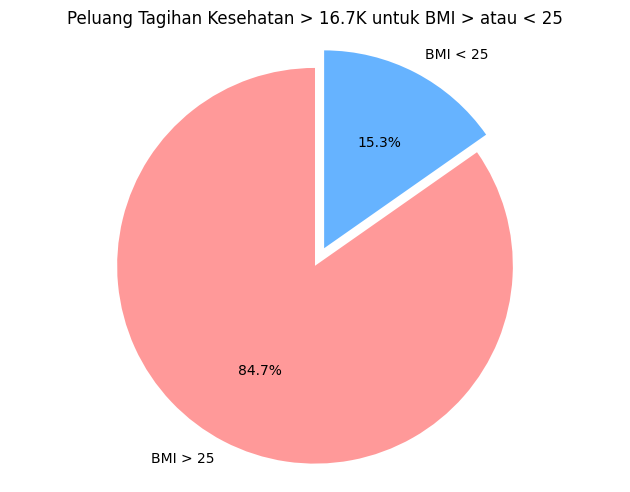

In [ ]:
# Analisa Variabel Kontinu
"""
Mana yang lebih mungkin terjadi
- Seseorang dengan BMI diatas 25 mendapatkan tagihan kesehatan diatas 16.7k, atau
- Seseorang dengan BMI dibawah 25 mendapatkan tagihan kesehatan diatas 16.7k
"""

# hitung jumlah orang dengan BMI di atas atau di bawah 25 yang mendapatkan tagihan kesehatan di atas 16.7k
overweight_highcharges = df[(df['bmi'] > 25) & (df['charges'] > 16700)].shape[0]
normalweight_highcharges = df[(df['bmi'] <= 25) & (df['charges'] > 16700)].shape[0]

# hitung proporsi
total_highcharges = df[df['charges'] > 16700].shape[0]
prop_overweight_highcharges = overweight_highcharges / total_highcharges
prop_normalweight_highcharges = normalweight_highcharges / total_highcharges

# tampilkan hasil
print('Proporsi orang dengan BMI di atas 25 yang mendapatkan tagihan kesehatan di atas 16.7k:', round(prop_overweight_highcharges * 100, 2), '%')
print('Proporsi orang dengan BMI di bawah 25 yang mendapatkan tagihan kesehatan di atas 16.7k:', round(prop_normalweight_highcharges * 100, 2), '%')

# vsiualisasi dalam pie chart
labels = ['BMI > 25', 'BMI < 25']
sizes = [prop_overweight_highcharges, prop_normalweight_highcharges]
colors = ['#ff9999','#66b3ff']
explode = (0.1, 0) 

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)

ax1.axis('equal')  
plt.tight_layout()
plt.title('Peluang Tagihan Kesehatan > 16.7K untuk BMI > atau < 25')
plt.show()

Proporsi perokok dengan BMI di atas 25 yang mendapatkan tagihan kesehatan di atas 16.7k: 64.37 %
Proporsi non perokok dengan BMI di atas 25 yang mendapatkan tagihan kesehatan di atas 16.7k: 20.36 %


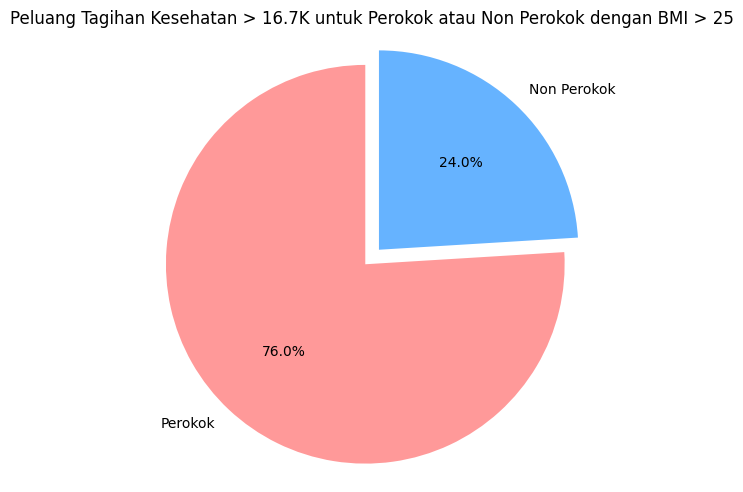

In [ ]:
# Analisa Variabel Kontinu
"""
Mana yang lebih mungkin terjadi
Seseorang perokok dengan BMI diatas 25 mendapatkan tagihan kesehatan diatas 16.7k, atau
Seseorang non perokok dengan BMI diatas 25 mendapatkan tagihan kesehatan diatas 16.7k
"""

# hitung perokok atau non perokok dengan BMI di atas 25 yang mendapatkan tagihan kesehatan di atas 16.7k
proporsi_perokok = df[(df['smoker'] == 'yes') & (df['bmi'] > 25) & (df['charges'] > 16700)].shape[0]
proporsi_non_perokok = df[(df['smoker'] == 'no') & (df['bmi'] > 25) & (df['charges'] > 16700)].shape[0]

# hitung proporsi
total_highcharges = df[df['charges'] > 16700].shape[0]
prop_proporsi_perokok = proporsi_perokok / total_highcharges
prop_proporsi_non_perokok = proporsi_non_perokok / total_highcharges

# tampilkan hasil
print('Proporsi perokok dengan BMI di atas 25 yang mendapatkan tagihan kesehatan di atas 16.7k:', round(prop_proporsi_perokok * 100, 2), '%')
print('Proporsi non perokok dengan BMI di atas 25 yang mendapatkan tagihan kesehatan di atas 16.7k:', round(prop_proporsi_non_perokok * 100, 2), '%')

# vsiualisasi dalam pie chart
labels = ['Perokok', 'Non Perokok']
sizes = [prop_proporsi_perokok, prop_proporsi_non_perokok]
colors = ['#ff9999','#66b3ff']
explode = (0.1, 0) 

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)

ax1.axis('equal')  
plt.tight_layout()
plt.title('Peluang Tagihan Kesehatan > 16.7K untuk Perokok atau Non Perokok dengan BMI > 25')
plt.show()


<ipython-input-135-633a9f4c3e90>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


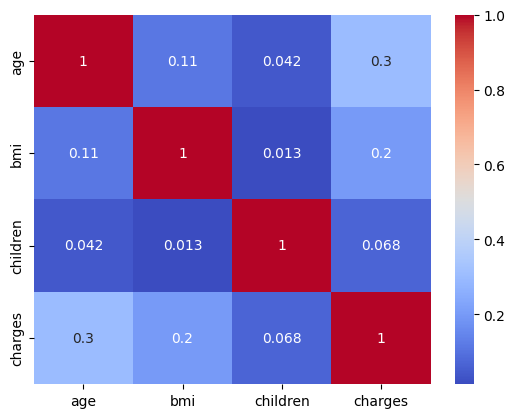

In [ ]:
# Analisa Korelasi Variabel

# menghitung korelasi antar kolom
corr = df.corr()

# menampilkan heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

In [ ]:
# Pengujian Hipotesis
# 1. Tagihan kesehatan perokok lebih tinggi daripada tagihan kesehatan non perokok

# Mengambil data tagihan kesehatan perokok dan non perokok
charges_perokok = df[df['smoker'] == 'yes']['charges']
charges_non_perokok = df[df['smoker'] == 'no']['charges']

# Melakukan uji t-test independent
t, p_value = stats.ttest_ind(charges_perokok, charges_non_perokok, equal_var=False)

# tentukan alpha
alpha = 0.05

# Menampilkan hasil uji
print('P-Value:', p_value)
if p_value < alpha:
    print('Kesimpulan: H0 ditolak, tagihan kesehatan perokok lebih tinggi daripada non perokok')
else:
    print('Kesimpulan: H0 diterima, tidak cukup bukti untuk menyatakan tagihan kesehatan perokok lebih tinggi daripada non perokok')

P-Value: 5.88946444671698e-103
Kesimpulan: H0 ditolak, tagihan kesehatan perokok lebih tinggi daripada non perokok


In [ ]:
# Pengujian Hipotesis
# 2. Proporsi perokok laki laki lebih besar dari perempuan

# hitung jumlah perokok laki-laki dan perempuan
male_smokers = len(df[(df.sex == "male") & (df.smoker == "yes")])
female_smokers = len(df[(df.sex == "female") & (df.smoker == "yes")])

# hitung jumlah populasi laki-laki dan perempuan
total_males = len(df[df.sex == "male"])
total_females = len(df[df.sex == "female"])

# proporsi perokok laki-laki
p1 = male_smokers/ total_males
# proporsi perokok perempuan
p2 = female_smokers / total_females

# hipotesis nol: proporsi perokok laki-laki sama dengan proporsi perokok perempuan
# hipotesis alternatif: proporsi perokok laki-laki lebih besar daripada proporsi perokok perempuan
alpha = 0.05

# hitung z-score dan p-value
count = np.array([male_smokers, female_smokers])
nobs = np.array([total_males, total_females])
z_score, p_value = proportions_ztest(count, nobs, alternative='larger')

# Menampilkan hasil uji
print('P-Value:', p_value)
if p_value < alpha:
    print("Kesimpulan: H0 ditolak, proporsi perokok laki-laki lebih besar daripada proporsi perokok perempuan.")
else:
    print("Kesimpulan: H0 diterima, proporsi perokok laki-laki sama dengan proporsi perokok perempuan.")

P-Value: 0.002662057082160266
Kesimpulan: H0 ditolak, proporsi perokok laki-laki lebih besar daripada proporsi perokok perempuan.


In [ ]:
# Pengujian Hipotesis
# 3. Variansi tagihan kesehatan perokok dan non perokok sama

# memisahkan data tagihan kesehatan perokok dan non-perokok
perokok = df[df['smoker'] == 'yes']['charges']
non_perokok = df[df['smoker'] == 'no']['charges']

# uji hipotesis menggunakan tes F untuk uji perbedaan variansi
alpha = 0.05

var_perokok = np.var(perokok, ddof=1)
var_non_perokok = np.var(non_perokok, ddof=1)

# hitung F ratio
f_test = var_perokok / var_non_perokok

df1 = len(perokok) - 1
df2 = len(non_perokok) - 1

krit_f = f.ppf(1-alpha, df1, df2)

# Menampilkan hasil uji
print('p-value:', p_value)
if f_test > krit_f:
    print("Kesimpulan: H0 ditolak, variansi tagihan kesehatan perokok sama dengan variansi tagihan kesehatan non-perokok.")
else:
    print("Kesimpulan: H0 diterima, variansi tagihan kesehatan perokok tidak sama dengan variansi tagihan kesehatan non-perokok.")


p-value: 1.1102230246251565e-16
Kesimpulan: H0 ditolak, variansi tagihan kesehatan perokok sama dengan variansi tagihan kesehatan non-perokok.


In [5]:
# Pengujian Hipotesis
# 4. Tagihan kesehatan dengan BMI diatas 25 lebih tinggi daripada tagihan kesehatan dengan BMI dibawah 25

# Mengambil data tagihan kesehatan dengan BMI diatas 25 dan dibawah 25
charges_bmi_above25 = df[df['bmi']>25]['charges']
charges_bmi_below25 = df[df['bmi']<=25]['charges']

# Melakukan uji t-test independent
t, p_value = stats.ttest_ind(charges_bmi_above25, charges_bmi_below25, equal_var=False)

# Menampilkan hasil uji
print('P-Value:', p_value)
if p_value < 0.05:
    print('Kesimpulan: H0 ditolak, tagihan kesehatan dengan BMI diatas 25 lebih tinggi daripada dibawah 25')
else:
    print('Kesimpulan: H0 diterima, tidak cukup bukti untuk menyatakan tagihan kesehatan dengan BMI diatas 25 lebih tinggi daripada dibawah 25')

P-Value: 4.397170873770558e-09
Kesimpulan: H0 ditolak, tagihan kesehatan dengan BMI diatas 25 lebih tinggi daripada dibawah 25


In [8]:
# Pengujian Hipotesis
# 5. Tagihan kesehatan laki-laki lebih besar dari perempuan

# Mengambil data tagihan kesehatan dengan gender male dan female
male_charges = df[df.sex == 'male'].charges
female_charges = df[df.sex == 'female'].charges

# Melakukan uji t-test independent
t_stat, p_val = stats.ttest_ind(male_charges, female_charges, equal_var=False)

# Menampilkan hasil uji
print('P-Value:', p_val)
if p_val < 0.05:
    print("H0 ditolak, Tagihan kesehatan laki-laki lebih besar dari perempuan")
else:
    print("H0 diterima, Tagihan kesehatan laki-laki sama dengan perempuan")

P-Value: 0.03584101495601664
H0 ditolak, Tagihan kesehatan laki-laki lebih besar dari perempuan
